# 6.4 part 1 Machine Learning_Regression Analysis

# Contents
    1. Import libraries and data
    2. Data cleaning
    3. Hypothesis
    4. Data prep for regression analysis 
    5. Regression analysis
    6. Summary
    7. Export data

# 1. Import Libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# creating path for import
path = r'/Users/bdigregorio/Desktop/CareerFoundry/Data Immersion/Data Immersion 6/Flavors of Cacao Analysis'


In [4]:
# importing 'df_fc3'
df_fc3 = pd.read_excel(os.path.join(path, '02 Data', 'Prepared Data', 'df_fc3.xlsx'))


# 2. Data cleaning


In [5]:
df_fc3.head()

,Unnamed: 0,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Most Memorable Characteristics,Rating,Number_of_Ingredients,Ingredients_abbr,Cocoa Level,Ingredient Level,Rating Level
0,0,Manoa,U.S.A.,2012,Liberia,"Liberia, batch 174",0.72,"molassses, intense, off, herb",3.25,3,"B,S,C",Mid percent,3,Mid-level
1,1,Manoa,U.S.A.,2012,U.S.A.,"Hawai'i Island, Hamakua, Hawaiian Crown, b. 176",0.72,"oily, tangy, fruit, earthy",2.75,3,"B,S,C",Mid percent,3,Mid-level
2,2,Manoa,U.S.A.,2012,Peru,"Piura, batch 173",0.72,"banana, menthol, medicinal",3.00,3,"B,S,C",Mid percent,3,Mid-level
3,3,Manoa,U.S.A.,2012,U.S.A.,"O'ahu Island, Winward,Maunawili district, b. 151",0.72,"molasses, sweet, cocoa",3.25,3,"B,S,C",Mid percent,3,Mid-level
4,4,Nanea,U.S.A.,2013,U.S.A.,Criollo Blend,0.85,"sandy, spicy, earthy",3.50,3,NaN,High percent,3,Mid-level


In [6]:
df_fc3.shape

(2657, 14)

In [7]:
df_fc3.drop(columns = ['Unnamed: 0'],inplace=True)

In [8]:
df_fc3.columns

Index(['Company (Manufacturer)', 'Company Location', 'Review Date',
       'Country of Bean Origin', 'Specific Bean Origin or Bar Name',
       'Cocoa Percent', 'Most Memorable Characteristics', 'Rating',
       'Number_of_Ingredients', 'Ingredients_abbr', 'Cocoa Level',
       'Ingredient Level', 'Rating Level'],
      dtype='object')

In [9]:
# re-ordering the columns for easier view of related column names
df_fc3 = df_fc3[['Company (Manufacturer)','Company Location', 'Review Date', 
                 'Country of Bean Origin', 'Specific Bean Origin or Bar Name',
                 'Cocoa Percent','Cocoa Level',
                 'Number_of_Ingredients', 'Ingredient Level',
                 'Rating','Rating Level',
                 'Ingredients_abbr','Most Memorable Characteristics']]


In [10]:
df_fc3.head()

,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Cocoa Level,Number_of_Ingredients,Ingredient Level,Rating,Rating Level,Ingredients_abbr,Most Memorable Characteristics
0,Manoa,U.S.A.,2012,Liberia,"Liberia, batch 174",0.72,Mid percent,3,3,3.25,Mid-level,"B,S,C","molassses, intense, off, herb"
1,Manoa,U.S.A.,2012,U.S.A.,"Hawai'i Island, Hamakua, Hawaiian Crown, b. 176",0.72,Mid percent,3,3,2.75,Mid-level,"B,S,C","oily, tangy, fruit, earthy"
2,Manoa,U.S.A.,2012,Peru,"Piura, batch 173",0.72,Mid percent,3,3,3.00,Mid-level,"B,S,C","banana, menthol, medicinal"
3,Manoa,U.S.A.,2012,U.S.A.,"O'ahu Island, Winward,Maunawili district, b. 151",0.72,Mid percent,3,3,3.25,Mid-level,"B,S,C","molasses, sweet, cocoa"
4,Nanea,U.S.A.,2013,U.S.A.,Criollo Blend,0.85,High percent,3,3,3.50,Mid-level,NaN,"sandy, spicy, earthy"


### ***Although this set has been cleaned I will check it again out of diligence!***
### Missing values

In [11]:
# check missing values
df_fc3.isnull().sum()

Company (Manufacturer)               0
Company Location                     0
Review Date                          0
Country of Bean Origin               0
Specific Bean Origin or Bar Name     0
Cocoa Percent                        0
Cocoa Level                          0
Number_of_Ingredients                0
Ingredient Level                     0
Rating                               0
Rating Level                         0
Ingredients_abbr                    87
Most Memorable Characteristics       0
dtype: int64

### As commented in an earlier notebook: "Ingredients" shows 87 missing values. I believe it impossible to impute the ingredients of a recipe. For our purposes now this column is not necessary but I am not dropping it as it may be interesting/helpful to explore later.  

In [12]:
# check for duplicates again
dups = df_fc3.duplicated()

In [13]:
dups.shape

(2657,)

### No duplicates

### Extreme values check

/var/folders/sy/t8rtd3yx6xg83r29mvqjg7cm0000gp/T/ipykernel_96534/1972655363.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_fc3['Cocoa Percent'], bins=25)


<Axes: xlabel='Cocoa Percent', ylabel='Density'>

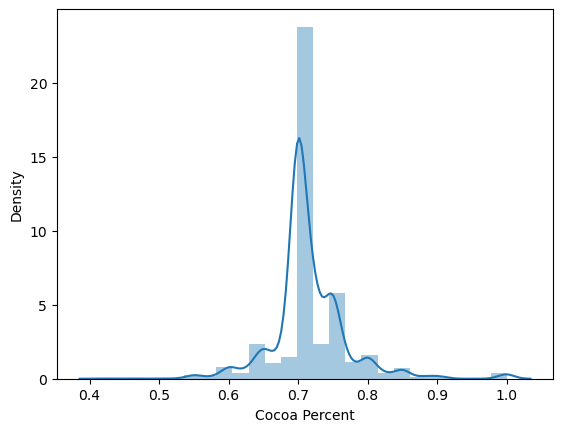

In [14]:
sns.distplot(df_fc3['Cocoa Percent'], bins=25)

### It looks like from the histogram there are many outliers at 0.7. But from previuos study of the data we know, simply, mot of the chocolate bars are made with this mid-range cocoa percent. As we can see below in the summary stats: most cocoa perent values are 70%.

In [15]:
# summary stats
df_fc3['Cocoa Percent'].agg(['mean','min', 'median', 'max',])

mean      0.716131
min       0.420000
median    0.700000
max       1.000000
Name: Cocoa Percent, dtype: float64

In [16]:
# Creating how to see Rating mode values of ''Cocoa Percent''
# Custom function to calculate the mode
def mode(group):
    return group.mode().iloc[0]  

In [17]:
# summary stats
df_fc3['Cocoa Percent'].agg(['mean','min', 'median', 'max',mode])


mean      0.716131
min       0.420000
median    0.700000
max       1.000000
mode      0.700000
Name: Cocoa Percent, dtype: float64

# 3. HYPOTHESIS

## An earlier hypothesis will be looked into now. It is:
## Chocolate bars with the highest rating have a mid-level amount of cocoa.
***(1= "Completely Cocoa"), (>=0.75 and <1: "High percent"), (>= 0.6 and < 0.75: "Mid percent), ("<0.6: "Low percent")***

# 4. Data prep for regression analysis 

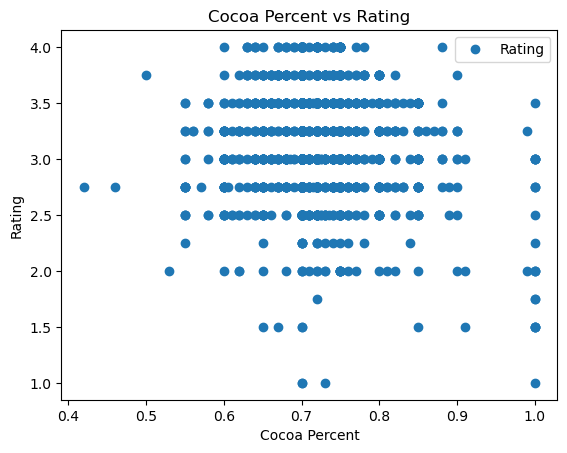

In [18]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
# Trying to understand how the cocoa level (independent variable) relates to the rating (dependent variable)
df_fc3.plot(x = 'Cocoa Percent', y='Rating',style='o') 
plt.title('Cocoa Percent vs Rating')  
plt.xlabel('Cocoa Percent')  
plt.ylabel('Rating')
plt.show()

In [19]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_fc3['Cocoa Percent'].values.reshape(-1,1)
y = df_fc3['Rating'].values.reshape(-1,1)

In [20]:
X

array([[0.72],
       [0.72],
       [0.72],
       ...,
       [0.73],
       [0.7 ],
       [0.7 ]])

In [21]:
y

array([[3.25],
       [2.75],
       [3.  ],
       ...,
       [2.75],
       [2.5 ],
       [2.5 ]])

In [22]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 5. Regression analysis

In [23]:
# Creating a regression object.
# This is the regression object, which will be fit onto the training set.

regression = LinearRegression()  

In [24]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

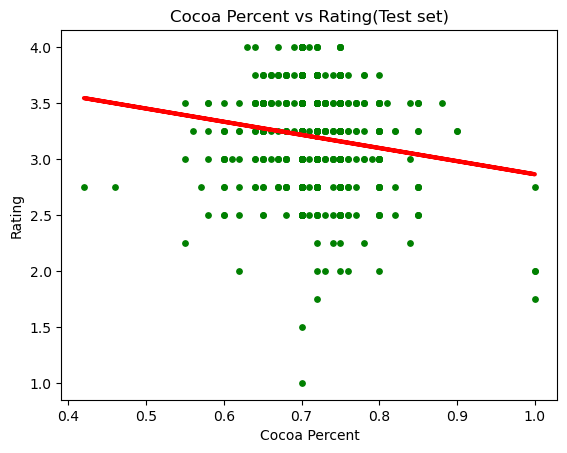

In [26]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='green', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Cocoa Percent vs Rating(Test set)')
plot_test.xlabel('Cocoa Percent')
plot_test.ylabel('Rating')
plot_test.show()

In [27]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [28]:
# Print the model summary statistics. 
# Evaluating the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.17291784]]
Mean squared error:  0.17768609893610307
R2 score:  0.015108597605419716


### Negative slope indicates a negative relationship: as "Cocoa Percent" (X) rises, "Rating" (y) falls.                                                                                              
### MSE: not a large number. Prediction may be close to the actual results but R2 score is very low (0.015) and does not indicate a very good model fit.

In [29]:
y_predicted

array([[3.19136778],
       [3.33211792],
       [3.21482614],
       [3.19136778],
       [3.15618024],
       [3.15618024],
       [3.21482614],
       [3.21482614],
       [3.21482614],
       [3.27347203],
       [3.21482614],
       [3.21482614],
       [3.14445107],
       [3.21482614],
       [3.21482614],
       [3.21482614],
       [3.21482614],
       [3.21482614],
       [3.1796386 ],
       [3.15618024],
       [3.23828449],
       [3.21482614],
       [3.15618024],
       [3.25001367],
       [3.09753435],
       [3.15618024],
       [3.21482614],
       [3.21482614],
       [3.21482614],
       [3.22655531],
       [3.33211792],
       [3.21482614],
       [3.1796386 ],
       [3.21482614],
       [3.21482614],
       [3.21482614],
       [3.15618024],
       [3.27347203],
       [3.15618024],
       [3.03888846],
       [3.15618024],
       [3.15618024],
       [3.21482614],
       [3.21482614],
       [3.23828449],
       [3.21482614],
       [3.21482614],
       [3.214

In [30]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(25)

,Actual,Predicted
0,4.00,3.191368
1,3.00,3.332118
2,3.75,3.214826
3,3.75,3.191368
4,2.50,3.156180
5,3.25,3.156180
6,3.75,3.214826
7,3.50,3.214826
8,3.25,3.214826
9,3.00,3.273472


### Comparing how the regression fits the traing set

In [31]:
# Predicting the X_train

y_predicted_train = regression.predict(X_train)

In [32]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [33]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.17291784]]
Mean squared error:  0.19691330147125496
R2 score:  0.021755853734249597


### Slope has not changed.
### MSE increased by approx. 0.02
### R2 score increased by approx. 0.06

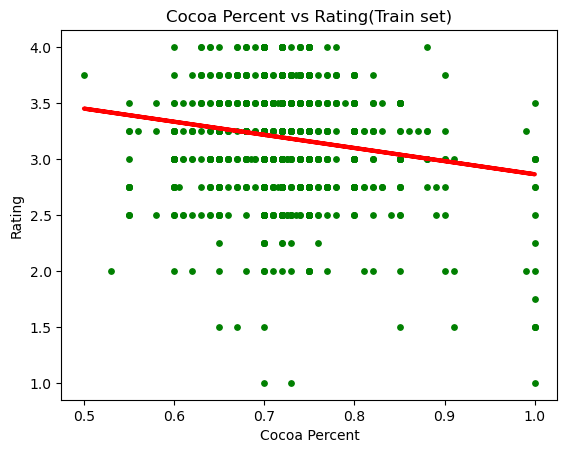

In [34]:
# scatterplot the training set.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Cocoa Percent vs Rating(Train set)')
plot_test.xlabel('Cocoa Percent')
plot_test.ylabel('Rating')
plot_test.show()

In [35]:
data = pd.DataFrame({'Actual': y_train.flatten(), 'Predicted': y_predicted_train.flatten()})
data.head(25)

,Actual,Predicted
0,2.50,3.214826
1,3.00,3.097534
2,3.00,3.191368
3,3.50,3.214826
4,3.00,3.214826
5,3.00,3.250014
6,3.00,3.191368
7,3.00,3.214826
8,3.50,3.214826
9,2.50,3.203097


### In viewing the 'actual' and the 'predicted' values of the training set, I do not believe this is a very good fit of a model. For instance, two examples above: 
### row 0: actual = 2.50, predicted =	3.214826.
### row 12: actual = 4.00, predicted = 3.214826
### These are fairly wide discrepancies but appear to be the norm.


# 6. Summary

## Of course, we always have to consider the bias for any project. As stated earlier, the rating of chocolate bars is a subjective tasting. 
## Previous analyses have shown most favorably tasting bars (high ratings) have a mid-level cocoa percents. There has been evidence in the data to project that as cocoa percents get close to 100% the ratings do go down, but the above model does not appear to be a very good predictor of actual results of cocoa percents and subsequent ratings. 

In [36]:
# Export df_fc3 again just to have columns reordered in excel file
df_fc3.to_excel(os.path.join(path, '02 Data', 'Prepared Data', 'df_fc3_B.xlsx'))